# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [4]:
data = pd.read_csv('iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

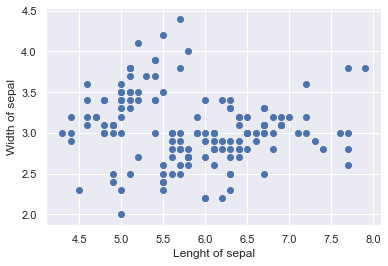

In [5]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [8]:
# Make a copy of the original data
new_data = data.copy()
kam = KMeans(2)
kam.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# This is done in order to view the clusters next to the data
cluster = data.copy()
# predict the cluster for each observation
cluster['clustered'] = kam.fit_predict(new_data)

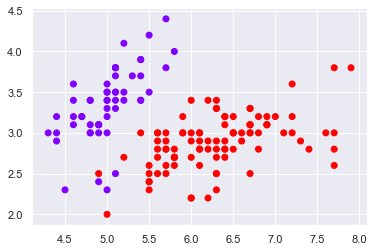

In [16]:
plt.scatter(cluster['sepal_length'], cluster['sepal_width'], c= cluster ['clustered'], cmap = 'rainbow')
plt.show()

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [13]:
from sklearn import preprocessing
scaled_data = preprocessing.scale(data)
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [14]:
kam_scale = KMeans(2)
kam.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# This is done in order to view the clusters next to the data
cluster_scale = data.copy()
# predict the cluster for each observation
cluster_scale['clustered'] = kam_scale.fit_predict(scaled_data)

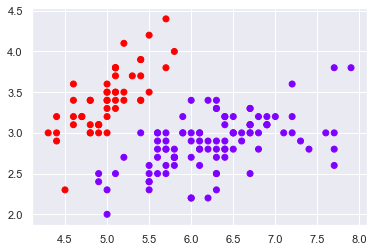

In [18]:
plt.scatter(cluster_scale['sepal_length'], cluster_scale['sepal_width'], c= cluster_scale ['clustered'], cmap = 'rainbow')
plt.show()

The two solutions look identical

## Take Advantage of the Elbow Method

### WCSS

In [19]:
wcss = []
num_clusters = 11

for i in range (1,num_clusters):
    kam = KMeans(i)
    kam.fit(scaled_data)
    wcss_iter = kam.inertia_
    wcss.append(wcss_iter)

In [20]:
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.57683895971645,
 91.29544474066982,
 80.23060704506958,
 70.8591973039602,
 62.682453823719655,
 54.62970753447029,
 47.333634811051276]

### The Elbow Method

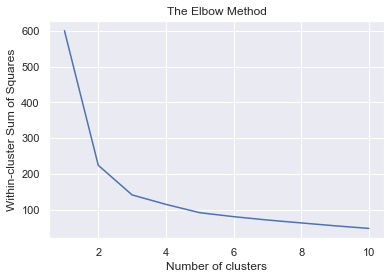

In [22]:
total_clusters = range(1,num_clusters)
plt.plot(total_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

plt.show()

How many clusters are there? 2 or 3